# DATA100 GROUP 2 FINAL PROJECT
# PHILIPPINE DENGUE CASES 2016-2020
<a id='PHILIPPINE DENGUE CASES'></a>
Submitted by: Group 2

Members:
1. Coronado, Calvin
2. Fausto, Lorane Bernadeth
3. Leonida, Dani
4. Li, Julian
5. Maronilla, Mary Avelyn
6. Ong, Elyssia

This notebook is an exploratory data analysis on the [Philippine Dengue Cases Dataset](https://www.kaggle.com/datasets/vincentgupo/dengue-cases-in-the-philippines). The dataset will be explained, cleaned, and explored by the end of this notebook.

| **`Table of Contents`** |
| --- |
| [The Dataset](#the-dataset) |
| [Reading the Dataset](#reading-the-dataset) |
| [Cleaning the Dataset](#cleaning-the-dataset) |
| [Exploratory Data Analysis](#exploratory-data-analysis) |
| - [Question 1](#question-1) |
| [Conclusion](#conclusion) |

## Importing Libraries
For this notebook, **numpy**, **pandas**, and **matplotlib** must be imported.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## The Dataset

-- [Return to Table of Contents](#DATA100-GROUP-2-FINAL-PROJECT) --

`dataset title here` is *describe dataset here. Include where it came from and how it is compiled. Include limitations if there are.*

The dataset is provided as a `.csv` file where it can be viewed in Excel and Notepad. 

This dataset contains 1020 **observations** across 5 **variables**. Each row represents **1 month per year**, while columns represent **dengue cases information**. The following are the variables in the dataset and their descriptions:

| Variable Name | Description |
| --- | --- |
| **`Month`** | Month of the year in text format |
| **`Year`** | Ranges from 2016-2020 in numerical format |
| **`Region`** | Region in the Philippines |
| **`Dengue_Cases`** | Number of Monthly Cases per region (including deaths) |
| **`Dengue_Deaths`** | Number of Monthly Deaths per region due to dengue |

## Reading the Dataset
-- [Return to Table of Contents](#DATA100-GROUP-2-FINAL-PROJECT) --

Here we will load the dataset using pandas. This will load the dataset into a pandas `DataFrame`. We use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to load the dataset. The path will have to be changed depending on the location of the file in your machine.


In [3]:
cases_df = pd.read_csv('ph_dengue_cases2016-2020.csv')

The dataset is now loaded in the `imdb_df` variable. `imdb_df` is a [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It is a data structure for storing tabular data, and the main data structure used in pandas.

The next cell show the contents of the `DataFrame`.

In [7]:
cases_df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


Display the dataset info using the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function.

In [9]:
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


## Cleaning the Dataset

-- [Return to Table of Contents](#DATA100-GROUP-2-FINAL-PROJECT) --

Before we can begin exploring the data, we must first clean the dataset. This is to prevent inconsistencies that may cause problems or errors during analysis.

We then check if there are any duplicated data in the dataset. We do this by calling the [duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. The function checks and returns the duplicated values.

In [10]:
duplicated = cases_df[cases_df.duplicated()]
dupes = str(duplicated.shape)

print("Number of duplicates: "  + dupes[1 : (dupes.find(','))])
print(duplicated)

Number of duplicates: 0
Empty DataFrame
Columns: [Month, Year, Region, Dengue_Cases, Dengue_Deaths]
Index: []


As displayed above there are **``0 duplicates``** in the dataset. If there are duplicates These can be simply removed by calling the function the [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) function.

Check which columns have **NaN or Null** values and **count** how many null values each column has.

In [255]:
nan_variables = imdb_df.columns[imdb_df.isna().any()].to_list()
nan_count = imdb_df[nan_variables].isnull().sum()
nan_count

title_year        107
director_name     103
director_likes    103
duration           15
plot_keywords     152
content_rating    301
country             5
language           12
gross             874
budget            487
color              19
aspect_ratio      327
face_number        13
critic_reviews     49
user_reviews       21
actor1              7
actor1_likes        7
actor2             13
actor2_likes       13
actor3             23
actor3_likes       23
dtype: int64

Here is a graph of the amount of null data in each column for better visualization.

<AxesSubplot:>

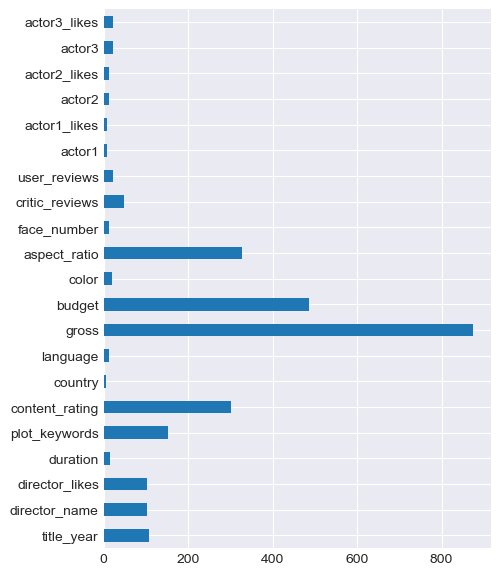

In [256]:
nan_count.plot.barh(figsize=(5,7))

The dataset should first be described for us to know how to handle the NaN values. Here we used the [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function to get the various details of each column. 

In [257]:
pd.options.mode.chained_assignment = None
imdb_df.describe()

,title_year,movie_likes,director_likes,duration,gross,budget,aspect_ratio,face_number,imdb_score,voted_users,critic_reviews,user_reviews,cast_likes,actor1_likes,actor2_likes,actor3_likes
count,4891.000000,4998.000000,4895.000000,4983.000000,4.124000e+03,4.511000e+03,4671.000000,4985.000000,4998.000000,4.998000e+03,4949.000000,4977.000000,4998.000000,4991.000000,4985.000000,4975.000000
mean,2002.468820,7487.430172,688.679060,107.213325,4.832565e+07,3.974787e+07,2.221417,1.368907,6.441056,8.347020e+04,139.890079,272.014667,9676.941176,6556.939892,1642.998796,639.900905
std,12.475235,19290.726563,2821.649616,25.248775,6.796483e+07,2.069689e+08,1.391185,2.014623,1.124107,1.380866e+05,121.477586,377.776210,18165.404578,15061.586700,4030.925303,1643.298282
min,1916.000000,0.000000,0.000000,7.000000,1.620000e+02,2.180000e+02,1.180000,0.000000,1.600000,5.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,0.000000,7.000000,93.000000,5.304835e+06,6.000000e+06,1.850000,0.000000,5.800000,8.560000e+03,50.000000,64.000000,1405.500000,611.500000,280.000000,133.000000
50%,2005.000000,162.500000,49.000000,103.000000,2.544575e+07,2.000000e+07,2.350000,1.000000,6.600000,3.426050e+04,110.000000,156.000000,3085.500000,984.000000,595.000000,369.000000
75%,2011.000000,3000.000000,192.000000,118.000000,6.231942e+07,4.500000e+07,2.350000,2.000000,7.200000,9.612075e+04,195.000000,324.000000,13740.500000,11000.000000,917.000000,635.000000
max,2016.000000,349000.000000,23000.000000,511.000000,7.605058e+08,1.221550e+10,16.000000,43.000000,9.500000,1.689764e+06,813.000000,5060.000000,656730.000000,640000.000000,137000.000000,23000.000000


Only columns that will be used for this notebook will be cleaned. Here are the columns to be used in the notebook:
- `gross`
- `budget`
- `director_likes`
- `actor1_likes`
- `actor2_likes`
- `actor3_likes`
- `movie_likes`
- `cast_likes`
- `imdb_score`
- `content_rating`
- `genres`
- `aspect_ratio`
- `face_number`
- `critic_reviews`

NaN values are present in the `gross` and `budget` columns. Since we want to observe these variables for the conclusion, we will delete rows with NaN values using the [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

In [258]:
imdb_df.dropna(axis = 0, subset=['gross'], inplace=True) 
imdb_df.dropna(axis = 0, subset=['budget'], inplace=True) 
imdb_df.dropna(axis = 0, subset=['aspect_ratio'], inplace=True) 
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3783 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      3783 non-null   object 
 1   title_year       3783 non-null   float64
 2   movie_imdb_link  3783 non-null   object 
 3   movie_likes      3783 non-null   int64  
 4   director_name    3783 non-null   object 
 5   director_likes   3783 non-null   float64
 6   duration         3783 non-null   float64
 7   genres           3783 non-null   object 
 8   plot_keywords    3764 non-null   object 
 9   content_rating   3751 non-null   object 
 10  country          3783 non-null   object 
 11  language         3781 non-null   object 
 12  gross            3783 non-null   float64
 13  budget           3783 non-null   float64
 14  color            3781 non-null   object 
 15  aspect_ratio     3783 non-null   float64
 16  face_number      3777 non-null   float64
 17  imdb_score    

Since the missing values on the `director_likes`, `actor1_likes`, `actor2_likes`, `actor3_likes`, and `movie_likes` columns are less than 10% of the total observations, the NaN values will be replaced.

The aforementioned columns also have outliers, so the NaN values in these columns will be replaced with their **median**. 

`aspect_ratio` is more of a flat consistent variable, so its NaN values will be replaced with the **mode** of the column

In [259]:
imdb_df['director_likes'].fillna(imdb_df['director_likes'].median(), inplace=True)
imdb_df['actor1_likes'].fillna(imdb_df['actor1_likes'].median(), inplace=True)
imdb_df['actor2_likes'].fillna(imdb_df['actor2_likes'].median(), inplace=True)
imdb_df['actor3_likes'].fillna(imdb_df['actor3_likes'].median(), inplace=True)
imdb_df['movie_likes'].fillna(imdb_df['movie_likes'].median(), inplace=True)
#Replace 0 with median
imdb_df['director_likes'] = imdb_df['director_likes'].replace([0], imdb_df['director_likes'].median())
imdb_df['actor1_likes'] = imdb_df['actor1_likes'].replace([0], imdb_df['actor1_likes'].median())
imdb_df['actor2_likes'] = imdb_df['actor2_likes'].replace([0], imdb_df['actor2_likes'].median())
imdb_df['actor3_likes'] = imdb_df['actor3_likes'].replace([0], imdb_df['actor3_likes'].median())
imdb_df['movie_likes'] = imdb_df['movie_likes'].replace([0], imdb_df['movie_likes'].median())

imdb_df['face_number'].fillna(imdb_df['face_number'].median(), inplace=True)
imdb_df['critic_reviews'].fillna(imdb_df['critic_reviews'].median(), inplace=True)
imdb_df['aspect_ratio'].fillna(imdb_df['aspect_ratio'].mode(), inplace=True)
imdb_df['plot_keywords'].fillna("none", inplace=True)
imdb_df['language'].fillna("English", inplace=True)
imdb_df['color'].fillna("Color", inplace=True)
imdb_df['actor2'].fillna("none", inplace=True)
imdb_df['actor3'].fillna("none", inplace=True)
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3783 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      3783 non-null   object 
 1   title_year       3783 non-null   float64
 2   movie_imdb_link  3783 non-null   object 
 3   movie_likes      3783 non-null   int64  
 4   director_name    3783 non-null   object 
 5   director_likes   3783 non-null   float64
 6   duration         3783 non-null   float64
 7   genres           3783 non-null   object 
 8   plot_keywords    3783 non-null   object 
 9   content_rating   3751 non-null   object 
 10  country          3783 non-null   object 
 11  language         3783 non-null   object 
 12  gross            3783 non-null   float64
 13  budget           3783 non-null   float64
 14  color            3783 non-null   object 
 15  aspect_ratio     3783 non-null   float64
 16  face_number      3783 non-null   float64
 17  imdb_score    

Next we inspect the `imdb_score` column using the function [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [260]:
imdb_df['imdb_score'].value_counts()

6.7    176
6.6    163
6.5    155
6.4    146
6.1    143
      ... 
2.5      1
2.2      1
9.2      1
2.0      1
3.2      1
Name: imdb_score, Length: 74, dtype: int64

Upon inspection, there are *NaN or Null* values nor are there any invalid values or values that are of a different data type. Hence, this column does not need to be cleaned.

Next we create a new column entitled `profit` to easily access the profit of each movie.

In [261]:
imdb_df['profit'] = imdb_df['gross'] - imdb_df['budget']
imdb_df['profit']

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
5      -190641321.0
           ...     
5027       663780.0
5029      -905404.0
5033       417760.0
5035      2033920.0
5042        84122.0
Name: profit, Length: 3783, dtype: float64

`content_rating` will also be used in this Exploratory Data Analysis so its values will be inspected.

In [262]:
imdb_df['content_rating'].value_counts()

R            1697
PG-13        1302
PG            566
G              89
Not Rated      35
Unrated        23
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

Upon inspection, there are **Null or NaN** values, old content rating labels such as: **M**, **GP**, **X**, **approved**, **not rated**, **passed**, and **unrated**. For this notebook, **MPAA** ratings will be used for the data to be uniformed, hence these labels will be changed to their MPAA counterpart.
- **Null** variables will be removed
- **M** and **GP** ratings will be changed to **PG**
- **X** ratings will be changed to **N-17**
- **Approved**, Not **Rated**, **Unrated**, and **Passed** will be changed to **R**

In [263]:
imdb_df.dropna(axis = 0, subset=['content_rating'], inplace=True) 

imdb_df['content_rating'] = imdb_df['content_rating'].replace(['M'], 'PG')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['GP'], 'PG')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['X'], 'NC-17')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['Approved'], 'R')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['Passed'], 'R')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['Not Rated'], 'R')
imdb_df['content_rating'] = imdb_df['content_rating'].replace(['Unrated'], 'R')

imdb_df['content_rating'].value_counts()

R        1775
PG-13    1302
PG        569
G          89
NC-17      16
Name: content_rating, dtype: int64

Now that we have cleaned all columns that will be used for this notebook. We can now begin the [Exploratory Data Analysis](#exploratory-data-analysis).

## Exploratory Data Analysis

-- [Return to Table of Contents](#DATA100-GROUP-2-FINAL-PROJECT) --


### Question 1: 

### EDA Question 1 Results

# Conclusion

-- [Return to Table of Contents](#DATA100-GROUP-2-FINAL-PROJECT) --